In [1]:
# import libs, modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Data-Source: "EU all_current_shared.parquet" - Baseline added as a shortcut to My Drive (google-colab)
# preprocessed DataSet by Andreas having all: countries and all years
file_path = "/content/drive/MyDrive/CO2/EU all_current_shared.parquet"
df = pd.read_parquet(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442792 entries, 0 to 14442791
Data columns (total 41 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     float32 
 1   Country                category
 2   VFN                    category
 3   Mp                     category
 4   Mh                     category
 5   Man                    category
 6   MMS                    category
 7   Tan                    category
 8   T                      category
 9   Va                     category
 10  Ve                     category
 11  Mk                     category
 12  Cn                     category
 13  Ct                     category
 14  Cr                     category
 15  r                      float32 
 16  m (kg)                 float32 
 17  Mt                     float32 
 18  Enedc (g/km)           float32 
 19  Ewltp (g/km)           float32 
 20  W (mm)                 float32 
 21  At1 (mm)               float3

In [3]:
# change some var types, since we have some NaNs in the r-column this must be done
# in two steps, missing values will be handeled later

# temporarily replace NaN with -1
df["r"] = df["r"].fillna(-1)

# change var-type
df = df.astype({'ID':      'int64',
                'r':       'int64',
                'year':    'int64',
                '#identical occurences': 'int64'})

# convert temp. Nan (-1) back to Nan -> ! "special" int type
df["r"] = df["r"].replace(to_replace = -1, value = np.nan).astype("Int64")  # Nullable integer type

df.info()
# -> success r as Int64 having also NaNs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442792 entries, 0 to 14442791
Data columns (total 41 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     int64   
 1   Country                category
 2   VFN                    category
 3   Mp                     category
 4   Mh                     category
 5   Man                    category
 6   MMS                    category
 7   Tan                    category
 8   T                      category
 9   Va                     category
 10  Ve                     category
 11  Mk                     category
 12  Cn                     category
 13  Ct                     category
 14  Cr                     category
 15  r                      Int64   
 16  m (kg)                 float32 
 17  Mt                     float32 
 18  Enedc (g/km)           float32 
 19  Ewltp (g/km)           float32 
 20  W (mm)                 float32 
 21  At1 (mm)               float3

In [4]:
# missing values per column
missing_values = df.isnull().sum()
print(missing_values)


ID                              0
Country                         0
VFN                       6022343
Mp                        1538457
Mh                              0
Man                        310768
MMS                       6048284
Tan                        490543
T                           62037
Va                         100484
Ve                         225223
Mk                          42908
Cn                          49370
Ct                          24710
Cr                        2826753
r                               4
m (kg)                      14075
Mt                        3802983
Enedc (g/km)              5466691
Ewltp (g/km)              3565598
W (mm)                    2252091
At1 (mm)                  2523206
At2 (mm)                  2738433
Ft                          24373
Fm                          85880
ec (cm3)                   613895
ep (KW)                   1401419
z (Wh/km)                13141566
IT                        9564034
Ernedc (g/km) 

In [5]:
# display first or sample rows/entries
df.head(5)
#df.sample(5)

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km),#identical occurences
0,280060,UK,NaN,NaN,UNKNOWN,UNKNOWN,VAUXHALL,NaN,A-H/MONOCAB,BF11,2A05ASXEGA7,VAUXHALL,ZAFIRA SRI XP 150 CDTI A,M1,NaN,14,1613.0,NaN,191.0,NaN,2703.0,1488.0,1512.0,DIESEL,M,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,2010,NaN,NaN,NaN,NaN,NaN,1
1,280060,UK,NaN,NaN,AUDI AG,NaN,AUDI,NaN,B8,LCAKAQ1,QM6B4006R8K927MGEM0,AUDI,S4 T QUATTRO,M1,NaN,3,1735.0,NaN,NaN,NaN,NaN,NaN,NaN,PETROL,M,2995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,2011,NaN,NaN,NaN,NaN,NaN,1
2,280060,PL,NaN,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2001/116*0211*27,1T,CFHCAF,FD6FD62E0187MQS7N1VR0S0,VOLKSWAGEN,TOURAN,M1,NaN,1,1629.0,NaN,131.0,NaN,2675.0,1794.0,1794.0,DIESEL,M,1968.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2012,NaN,NaN,NaN,NaN,NaN,1
3,280060,HU,NaN,NaN,HYUNDAI ASSAN,HYUNDAI ASSAN OTOMOTIV SANAYI VE,Hyundai,e11*2007/46*0192*04,ELH,F5D31,M65AZ1,HYUNDAI ASSAN,ix35,M1,NaN,1,1500.0,NaN,139.0,NaN,2640.0,1585.0,1586.0,DIESEL,M,1685.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2013,NaN,NaN,NaN,NaN,NaN,30
4,280060,HU,NaN,GENERAL MOTORS,OPEL,ADAM OPEL AG,Opel,e1*2007/46*0374*14,0G-A,CAHBC12,BA1N1FMHD5,Opel,Insignia Limousine HB,M1,NaN,4,1613.0,NaN,114.0,NaN,2737.0,1587.0,1590.0,DIESEL,M,1956.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2014,NaN,NaN,NaN,NaN,NaN,1


In [6]:
# number of unique values for all variables/columns in df: "EU all_current_shared.parquet"
df_nunique = df.nunique()
display(df_nunique)
# ID: -> 8169822 ~1/2 of entries (expectation was/is same amount as entries: 14442792 [?])
# Andreas-Feedback: ID is only unique per year from the source: CO2 EU datsets...


,0
ID,8169822
Country,30
VFN,29048
Mp,46
Mh,261
Man,477
MMS,11561
Tan,49909
T,26611
Va,72533


Countries -EU- registering vehicles:  30
Years     -EU- registering vehicles:  2010-2023



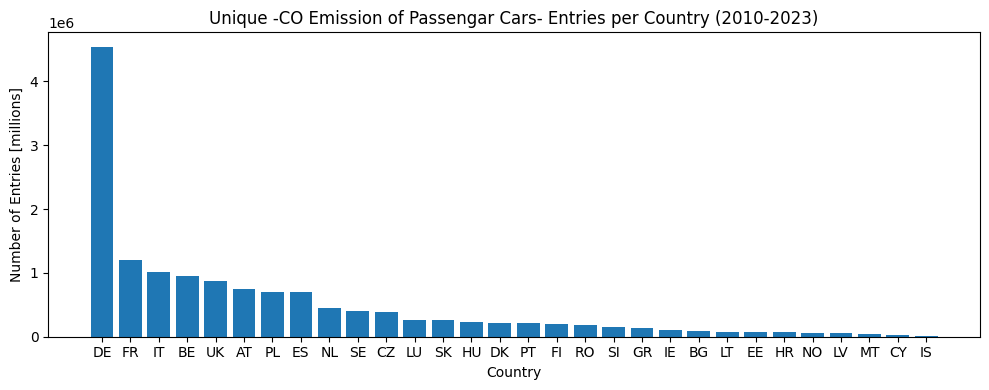

In [7]:
#display amount of countries
print("Countries -EU- registering vehicles: ",df["Country"].nunique())

#display resgistration years coverage
year_min = str(df["year"].min())[0:4]
year_max = str(df["year"].max())[0:4]
print("Years     -EU- registering vehicles: ", year_min + "-" + year_max)
print()

# display/graph unique entries per country (w/o: #identical occurences)
entries_per_country = df["Country"].value_counts()
# print("Unique entries per country (w/o: # identical occurences): \n" + str(entries_per_country))

plt.figure(figsize=(10, 4))
plt.bar(entries_per_country.index, entries_per_country.values)
plt.xlabel("Country")
plt.ylabel("Number of Entries [millions]")
plt.title("Unique -CO Emission of Passengar Cars- Entries per Country (2010-2023)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show();


<ipython-input-8-43303c016785>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_type_counts = df.groupby("Country")["Ft"].value_counts(normalize = True) * 100


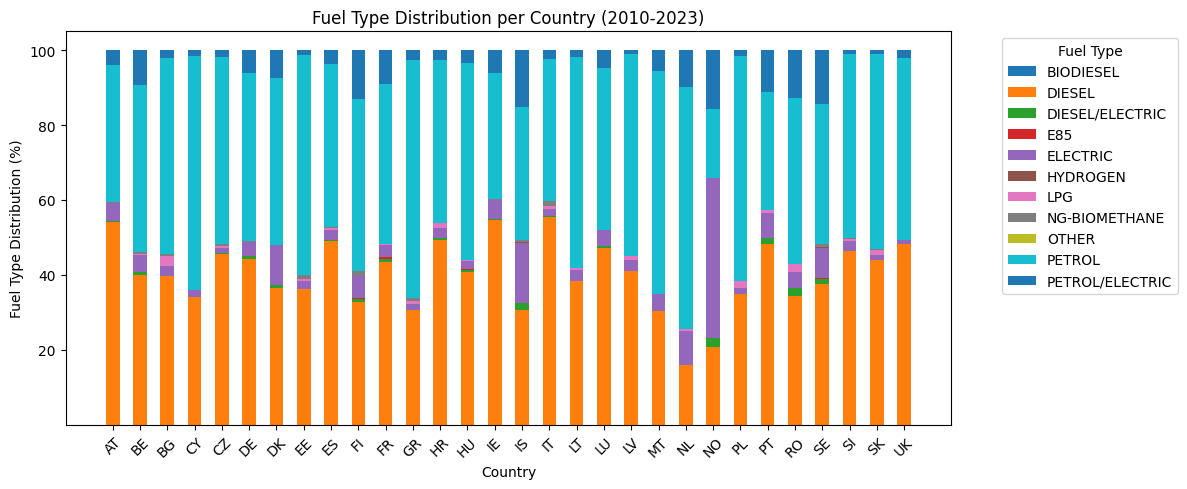

In [8]:
# Fuel Type distribution per country
# df_2023 = df.loc[df["year"] == 2023] # in case for detail view of year 2023

fuel_type_counts = df.groupby("Country")["Ft"].value_counts(normalize = True) * 100
fuel_type_counts = fuel_type_counts.unstack()
# print(fuel_type_counts)

# barplot of fuel_type_counts
# plt.figure(figsize=(10, 6))
# fuel_type_counts.plot(kind='bar', stacked=True)
# plt.show();

# barplot with matplotlib
plt.figure(figsize=(12, 5))

# Setting up the bar positions and width
bar_width = 0.5
countries = fuel_type_counts.index
indices = np.arange(len(countries))

# Plotting each fuel type as a separate layer in the stacked bar
bottom_values = np.zeros(len(countries))  # Track the bottom of each stack
fuel_types = fuel_type_counts.columns

for fuel_type in fuel_types:
    plt.bar(indices, fuel_type_counts[fuel_type], bar_width, label=fuel_type, bottom=bottom_values)
    bottom_values += fuel_type_counts[fuel_type]  # Update the bottom for the next fuel type

# Adding labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Fuel Type Distribution (%)')
plt.title('Fuel Type Distribution per Country (2010-2023)')
plt.xticks(indices, countries, rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
# sub dataframe with electric fuel only
df_electric = df.loc[df["Ft"].isin(["ELECTRIC"])]
df_electric.head()

# distribution of df_electric - Ewltp g(km)
display(df_electric["Ewltp (g/km)"].value_counts())
# -> 0.0 : 522094 (electric cars do not have CO2 emissions)
# -> 1.0 :      1 (wrong entry)

# delete not more used sub-dataframe to free RAM
del df_electric

,count
Ewltp (g/km),
0.0,522094
117.0,1


In [ ]:
# Assumption:
# Same cars (with same technical characteristics) are registered in different countries overlaping years
# -> one country enough, two years are enough
# ! took 30 sek. and mem. usage 9.5/12.7GB !

# Define the columns to drop
columns_to_drop = ["Country", "ID", "year", "Status", "Date of registration", "ech", "RLFI", "#identical occurences"]

# Drop the specified columns
df_reduced = df.drop(columns=columns_to_drop)

# Find duplicates in the dataset without the dropped columns
duplicates = df_reduced[df_reduced.duplicated(keep=False)]

# Count unique occurrences of these duplicates
num_duplicate_vehicles = duplicates.shape[0]

print("Number of vehicles that have duplicate entries accross:\n countries, years ", num_duplicate_vehicles)
# -> 827471

# Total number of entries in the dataset
total_entries = df.shape[0]

# Calculate the percentage of duplicate entries
duplicate_percentage = (num_duplicate_vehicles / total_entries) * 100

print("Percentage: ", round(duplicate_percentage,2))
# -> 5.73%

# liberate ram for the not more used df_reduced
del df_reduced
del duplicates

In [ ]:
# Since the goal is to predict the CO2 emissions by technical characteristics of internal combustion engines
# (not electric, not hybrid) and the CO2 emissions by EU regulations have been droping since 2010...
# the following entries will be - KEPT -  the others dropped:

# Years: 2023-2022;
# keeping the last two years (2023 and 2022) and droping 2010-2021 which are for historical/trend analysis.
#
# Country: France
# For being the second most big EU car market (registration counts) and for the possibility to merge this
# subset with the ADEME car-labbeling dataset from the French gouverment
#
# Ft (Fuel Type): PETROL, DIESEL, LPG, NG-BIOMETHANE, BIODIESEL, E85
# Electric, hbrid (fuel electric), hydrogen and others fuels will be droped to focus on the int. combustion

# z (Wh/km): none -> drop column
# This specific electric energy consumption will be droped since only interestic for electric, hybrid cars.

# Electric range (km): none -> drop column
# Electric range only relevant for electric, hybrid cars which are non-internal-combusting

# Status: none -> drop column
# The two categories P: Provisional (for the year 2022) and F: Final (for all other year) will be handled
# both as final, so it possible that after QA-checking the dataset for 2023 (P -> F) some values may change.

# ech (Character corresponding to the provisions used for the type-approval): none -> drop (?)
# Will be checked after first cleaning/drop-off [ ]

# RLFI (Roadload [Matrix] families identifier): none -> drop (?)
# # Will be checked after first cleaning/drop-off [ ]


In [ ]:
# unique fuel types for internal combustion engines
print("Unique fuel types: \n" + str(df["Ft"].value_counts()))

In [ ]:
# filter the DataFrame to keep only rows with specified fuel types
# create list of fuels for internal combustion only
fuel_int_combustion = ['PETROL', 'DIESEL', 'LPG', 'NG-BIOMETHANE', 'BIODIESEL', 'E85']

# filter the DataFrame to keep only rows with specified fuel types
df_int_combustion = df[df['Ft'].isin(fuel_int_combustion)]

# ----
# filter the Dataframe to keep only rows within the years 2022, 2023
df_int_combustion = df_int_combustion[df_int_combustion['year'].isin([2022, 2023])]

# ----
# filter the Dataframe to keep only rows within the country France (FR)
df_int_combustion = df_int_combustion[df_int_combustion['Country'] == 'FR']

#-----
# filter the Dataframe droping cols: ["z (Wh/km)", "Electric range (km)", "Status", "ech", "RLFI", "Date of registration", "#identical occurences", "r"]
df_int_combustion = df_int_combustion.drop(columns=["z (Wh/km)", "Electric range (km)", "Status", "ech", "RLFI", "Date of registration", "#identical occurences", "r"], axis = 1)
# display(df_int_combustion.info()) # -> some cols are empty

#----
# filter the Dataframe droping empty cols: ["MMS", "Enedc (g/km)", "Ernedc (g/km)", "De", "Vf" ]
df_int_combustion = df_int_combustion.drop(columns=["MMS", "Enedc (g/km)", "Ernedc (g/km)", "De", "Vf"], axis = 1)
display(df_int_combustion.info())

# Apply remove_unused_categories() to all categorical columns in the DataFrame
df_int_combustion = df_int_combustion.apply(
    lambda col: col.cat.remove_unused_categories() if col.dtype.name == 'category' else col
)
display(df_int_combustion.head())


In [ ]:
# number of unique values for all variables/columns
display(df_int_combustion.nunique())


In [ ]:
# Ct/Cr value_counts of Ct: Category of the vehicle type approved and Cr: Category of the vehicle registered
print("Unique values of Ct: \n" + str(df_int_combustion["Ct"].value_counts()))
print()
print("Unique values of Cr: \n" + str(df_int_combustion["Cr"].value_counts()))
# Ct -> M1:  210506, M1G: 7529
# Cr -> M1:  210506, M1G: 7529
# both columns now contain the same information, so:
# -> Cr (Category of the vehicle regitered) will be kept
# -> Ct (Category of the vehicle type approved) will be droped

# Meaning of the categories (source: ChatGPT!)
# M Categories: Passenger vehicles.
#   M1: Standard passenger cars.
#   M1G: Off-road passenger vehicles.
#   M2: Minibuses with more than eight seats.
# N Categories: Goods vehicles (commercial).
#   N1: Light commercial vehicles (≤ 3.5 tons).
#   N1G: Off-road light commercial vehicles.
#   N2: Medium trucks (3.5 to 12 tons).
#   N2G: Off-road medium trucks.
#   N3: Heavy trucks (> 12 tons).
#   N3G: Off-road heavy trucks.


In [ ]:
# Ct droping
df_int_combustion = df_int_combustion.drop(columns=["Ct"], axis = 1)


In [ ]:
# T (Type) value_counts Top 10
df_int_combustion["T"].value_counts().head(10)
# -> maybe to be droped later on [ ]

In [ ]:
# pairplot of all numerical vars
sns.pairplot(df_int_combustion)
plt.show();

In [ ]:
# m (kg) / Mt -> Mass in running order Completed/complete vehicle / WLTP test mass

# scatterplot of "m (kg)" versus Mt
plt.figure(figsize=(5, 4))
plt.scatter(df_int_combustion["m (kg)"], df_int_combustion["Mt"], alpha = 0.1)
plt.plot([0, 3500], [0, 3500], color='red', linestyle='--', linewidth=1.5)
plt.title("Scatterplot of m (kg) versus Mt")
plt.xlabel("m: (vehicle mass complete in kg)")
plt.ylabel("Mt: (vehicle mass at WLTP - Test in kg)")
plt.xlim(0, 3500)
plt.ylim(0, 3500)
plt.grid(True)
plt.show();

# Mt (WLTP) always higher ~ 10% -> "m (kg)" maybe to be droped [ ]

In [ ]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# print(df_int_combustion.columns)

# "Ewltp (g/km) versus "Fuel consumption" , hue = Ft (Fuel type)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Fuel consumption ", y="Ewltp (g/km)", hue = "Ft")
plt.legend(title = "Fuel type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ewltp (g/km) versus Fuel consumption")
plt.show();

# yuhuu, hole in one...
# we can see how the different line paths correspond to the different fuel types
# -> Ft as to be included in later ML-Model [ ]


In [ ]:
# # # # #
#
# Subtask: Project-Meeting: 09.10.24
#
# # # # #

# Take the dataset: EU all_current_shared.parquet and make a
# scatter-plot "Ewltp (g/km)" versus "Fuel consumption"
# with only "Petrol" as Ft (Fuel type)
# only_petrol_df = df.loc[(df["Ft"] == "PETROL") & (df["Ewltp (g/km)"] > 0)]
# display(only_petrol_df.head())

# plt.figure(figsize=(8, 4))
# sns.scatterplot(data= only_petrol_df, x= "Fuel consumption ", y= "Ewltp (g/km)", hue= "year", palette= "Spectral", alpha = 0.6)
# plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title("Ewltp (g/km) versus Fuel consumption (Petrol)")
# plt.show();
#
#
# # # # #

In [ ]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "Fuel consumption" , hue = Fm (Fuel mode)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Fuel consumption ", y="Ewltp (g/km)", hue = "Fm")
plt.legend(title='Fuel Mode', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ewltp (g/km) versus Fuel consumption")
plt.show();


In [ ]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "Fuel consumption" , hue = Mk
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Fuel consumption ", y="Ewltp (g/km)", hue = "IT", palette="Blues", alpha = 0.8)
plt.legend(title = "Innovative Technologies", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ewltp (g/km) versus Fuel consumption")
plt.show();

In [ ]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "ec (cm3)" , hue = Fuel types
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="ec (cm3)", y="Ewltp (g/km)", hue = "Ft", alpha = 0.6)
plt.legend(title = "Fuel type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ewltp (g/km) versus Engine Capacity (ec) in (ccm)")
plt.show();

In [ ]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "ep (KW)" , hue = Fuel types
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="ep (KW)", y="Ewltp (g/km)", hue = "Ft", alpha = 0.6)
plt.legend(title = "Fuel type", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ewltp (g/km) versus Engine Power (ep) in (kW)")
plt.show();

In [ ]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "Mt" , hue = Fuel types
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="Ewltp (g/km)", hue = "Cr")
plt.legend(title = "Type: M1= Std, M1G= Off-Road", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ewltp (g/km) versus Vehicle mass at WLTP-Test in (kg)")
plt.show();

In [ ]:
# Further Preporcoessing after visualizing some vars:
#  Drop columns/vars
#  Drop unused categorie
#  Missing Value handling
#  Outlier handling
#  Feature Engineering / Dim-reduction

In [ ]:
# Droping unused categories which appear in the sub-dataframe

# Apply remove_unused_categories() to all categorical columns in the subset
df_int_combustion = df_int_combustion.apply(lambda col: col.cat.remove_unused_categories() if col.dtype.name == 'category' else col)

In [ ]:
# Missing value handling

# missing value per column
df_int_combustion.isna().sum()


In [ ]:
# Missing value handling - continued -

# Ve has one single NaN value so will drop that row
df_int_combustion = df_int_combustion.dropna(axis = 0, subset = ["Ve"])
df_int_combustion.isna().sum()

# Mp = Manufacturing pooling is a Pool of manufactuers associated  togehther to reach CO2 emission targets
# Has a "bare" startegic meaning -> drop
df_int_combustion = df_int_combustion.drop("Mp", axis = 1)
display(df_int_combustion.isna().mean() * 100)
df_int_combustion.sample(10)

In [ ]:
# How to get Missing values: At1, At2, W from 2022 to 2023
#
# At1: Axle width steering axle (mm)
# At2: Axle width other axle (mm)
# W: Wheel Base (mm)
#
# Assumption:
# Same Mk: Make (Mercedes Benz) with same Cn: Comercial name (GLS 400 D), are about the same size -> At1, At2, W
# Assign this values as (Medians of groups: Mk, Cn) to the missing values (NaN) from 2022 to those same groups of 2023

# Step 1: Group the data by 'Mk' and 'Cn' and calculate the median for At1, At2, W
grouped_medians = df_int_combustion.groupby(['Mk', 'Cn'], observed=True)[['At1 (mm)', 'At2 (mm)', 'W (mm)']].median().reset_index()

# Step 2: Create a dictionary from the grouped data for quick lookup
median_lookup = grouped_medians.set_index(['Mk', 'Cn']).to_dict(orient='index')

# Step 3: Iterate through the DataFrame and fill missing values in 2023
for idx, row in df_int_combustion.iterrows():
    # Check if the row is from 2023 and has missing values in At1, At2, W
    if row['year'] == 2023 and (pd.isna(row['At1 (mm)']) or pd.isna(row['At2 (mm)']) or pd.isna(row['W (mm)'])):
        # Get the Mk and Cn for the row
        mk_value = row['Mk']
        cn_value = row['Cn']

        # Look up the median values from 2022
        if (mk_value, cn_value) in median_lookup:
            if pd.isna(row['At1 (mm)']):
                df_int_combustion.at[idx, 'At1 (mm)'] = median_lookup[(mk_value, cn_value)]['At1 (mm)']
            if pd.isna(row['At2 (mm)']):
                df_int_combustion.at[idx, 'At2 (mm)'] = median_lookup[(mk_value, cn_value)]['At2 (mm)']
            if pd.isna(row['W (mm)']):
                df_int_combustion.at[idx, 'W (mm)'] = median_lookup[(mk_value, cn_value)]['W (mm)']

display(df_int_combustion.head())
display(df_int_combustion.info())


In [ ]:
# check again where the At1, At2, W values are missing: year 2022, 2023
df_int_combustion.loc[df_int_combustion["year"] == 2022].isna().mean() * 100
df_int_combustion.loc[df_int_combustion["year"] == 2023].isna().mean() * 100

# OK still some entries (1406) for At1, At2, W missing onyl in 2023
# At1, At2, W = 1.4% for the year 2023 (no matching found)
# -> drop those entries

# drop entries/rows where At1, At2, W are NaN
df_int_combustion = df_int_combustion.dropna(axis = 0, subset = ["At1 (mm)", "At2 (mm)", "W (mm)"])
df_int_combustion.isna().sum()


In [ ]:
# Missing values - imputation visualization -

# let us visualize the imputed values for -> At1, At2, W...

# scatterplot of At1 versus Mt, hue = year
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="At1 (mm)", hue= "year", palette= "deep", alpha = 0.6)
plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Axle width steering axle (At1) versus Vehicle mass at WLTP-Test")
plt.show();

In [ ]:
# Missing values - imputation visualization -

# let us visualize the imputed values for At1, -> At2, W...

# scatterplot of At2 versus Mt, hue = year
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="At2 (mm)", hue= "year", palette= "deep", alpha = 0.6)
plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Axle width other axle (At1) versus Vehicle mass at WLTP-Test")
plt.show();


In [ ]:
# Missing values - imputation visualization -
#
# let us visualize the imputed values for At1, At2, -> W...

# scatterplot of W versus Mt, hue = year using Pandas
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="W (mm)", hue= "year", palette= "deep", alpha = 0.6)
plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Wheel Base (W) versus Vehicle mass at WLTP-Test")
plt.show();

In [ ]:
# Missing value handling continued
#
# IT and Erwltp (g/km)
# -> ~ 11% NaNs (23992)

# if no IT Innovative Technology is installed, then also no CO2 reduction in the WLTP-Test
df_int_combustion.loc[(df_int_combustion["IT"].isna()) & (df_int_combustion["Erwltp (g/km)"].isna())].shape
# -> (23992, 26) -> assumption is correct

# replace NaN in IT with "_none_" and replace NaN in ErWltp with 0
df_int_combustion["IT"] = df_int_combustion["IT"].cat.add_categories("_none_")
df_int_combustion["IT"] = df_int_combustion["IT"].fillna("_none_")
df_int_combustion["Erwltp (g/km)"] = df_int_combustion["Erwltp (g/km)"].fillna(0)
df_int_combustion.isna().sum()
# -> no missing values  -> :)

In [ ]:
# Outliers / Extrme Values ?

In [ ]:
# Outliers / Extreme Values (num. vars)
#
# create subset with only (real) numerical variable
# drop "ID", "year", "m (kg)" -> we keep Mt (mass at WLTP Test) which always ~ 10% higher
df_int_combustion_num = df_int_combustion.drop(["ID", "year", "m (kg)"], axis =1)

# select only numerical vars./columns
df_int_combustion_num = df_int_combustion_num.select_dtypes(include=[np.number])


In [ ]:
# Outliers / Extreme Values graphical representation I - Box-Plots -

# supress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# boxplot all numerical variables
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_int_combustion_num)
plt.xticks(rotation=90)
plt.show();

In [ ]:
# Otliers / Extreme Values

# Checking potential outliers for Engine Capacity

# show entries for Top-10 engine capacity (ec) [ccm]
display(df_int_combustion.sort_values(by = "ec (cm3)", ascending = False).head(10))
# -> "outliers compared to the "bulk" of cars, but extreme values instead of outliers
# -> These are Bugatti, Rolls Royce, Lamborghini
# -> will be kept, not droped

In [ ]:
# Outliers / Extreme Values graphical representation II

# plot all numerical variables
plt.figure(figsize=(9, 8))

# subplot 1
plt.subplot(3, 3, 1)
sns.histplot(data=df_int_combustion_num["Mt"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Mt (kg) \n -> Vehicle mass at WLTP test", fontsize = 9)

# subplot 2
plt.subplot(3, 3, 2)
sns.histplot(data=df_int_combustion_num["Ewltp (g/km)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Ewltp (g/km) \n -> CO2-emissions", fontsize = 9)

# subplot 3
plt.subplot(3, 3, 3)
sns.histplot(data=df_int_combustion_num["W (mm)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of W (mm) \n -> Wheel Base", fontsize = 9)

# subplot 4
plt.subplot(3, 3, 4)
sns.histplot(data=df_int_combustion_num["At1 (mm)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of At1 (mm) \n -> Steering axle width", fontsize = 9)

# subplot 5
plt.subplot(3, 3, 5)
sns.histplot(data=df_int_combustion_num["At2 (mm)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of At2 (mm) \n -> Other axle width", fontsize = 9)

# subplot 6
plt.subplot(3, 3, 6)
sns.histplot(data=df_int_combustion_num["ec (cm3)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of ec (cm3) \n -> Engine Capacity", fontsize = 9)

# subplot 7
plt.subplot(3, 3, 7)
sns.histplot(data=df_int_combustion_num["ep (KW)"], bins=40, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of ep (KW) \n -> Engine Power", fontsize = 9)

# subplot 8
plt.subplot(3, 3, 8)
sns.histplot(data=df_int_combustion_num["Erwltp (g/km)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Erwltp (g/km) \n -> CO2 em. Reduction", fontsize = 9)

# subplot 9
plt.subplot(3, 3, 9)
sns.histplot(data=df_int_combustion_num["Fuel consumption "], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Fuel consumption \n ->  ", fontsize = 9)


# Adjust layout and show the plot
plt.tight_layout()
plt.show();

# Results:
# No outliers, but extreme values, will be kept for first regression models ...
# NaNs in Erwltp (g/km) were set to 0 which now shows an odd distribution

In [ ]:
# create correlation matrix I
df_int_combustion_num_corr = round(df_int_combustion_num.corr(),2)

# draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_int_combustion_num_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix I - num. vars. only')
plt.show();

# Results:
# Top 3 correlation factors with Ewltp (g/km) are:
# Fuel consumption (l/100km): 0.90
# ep (KW): 0.78
# Mt (kg): 0.68
#
# Erwlt (g/km) which are the CO2 Emission reductions
# by using Innovative Technologies does not strongly correlate with any var
# but will be kept now.
#
# "Mt" the vehicle mass at WLTP Test conditions strongly correlates
# with A1t, A2t and W which are the Steering-/Other-Axle and Wheelbase dimensions in (mm)
# -> summarize this 3 Vars in one Wheel-Area (mm2) which would be an indicator
# -> of the vehicle size

In [ ]:
# still duplicates in the df_int_combustion_num ? pot. yes since columns were droped...
display(df_int_combustion_num.duplicated().sum())
# -> 94579

# drop duplicates just to see any effect on the corr matrix
df_int_combustion_num_dp = df_int_combustion_num.drop_duplicates()

# create correlation matrix
df_int_combustion_num_dp_corr = round(df_int_combustion_num_dp.corr(),2)

# draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_int_combustion_num_dp_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix II - droped duplicates')
plt.show();

# -> corr. matrix / heat_map slightly modified

In [ ]:
d_corr = df_int_combustion_num_dp_corr - df_int_combustion_num_corr
d_corr

# draw heatmap of d_corr
plt.figure(figsize=(6, 4))
sns.heatmap(d_corr, annot=True, cmap='coolwarm')
plt.title('Delta - Correlation Matrix (III)')
plt.show();

# not a big difference but a little bit ;)
# makes the cow not fat but nice to see the effect..
# will keep this in the backhand

In [ ]:
# Feature Engineering / Dimensionality Reduction
#
# "Mt" the vehicle mass at WLTP Test conditions strongly correlates
# with A1t, A2t and W which are the Steering-/Other-Axle and Wheelbase dimensions in (mm)
# -> summarize this 3 Vars in one "WA (mm2) = Wheel-Area (m2) which would be an indicator
# -> of the vehicle size

# create a new column by taking the avg of At1 and At2 and multypliying this by W
df_int_combustion_num["WA (m2)"] = round(((df_int_combustion_num["At1 (mm)"] +
                                           df_int_combustion_num["At2 (mm)"]) / 2) *
                                           df_int_combustion_num["W (mm)"] / 1000000, 2)

# drop the old columns
df_int_combustion_num = df_int_combustion_num.drop(["At1 (mm)", "At2 (mm)", "W (mm)"], axis = 1)

df_int_combustion_num.head()


In [ ]:
# create correlation matrix III
df_int_combustion_num_corr = round(df_int_combustion_num.corr(),2)

# draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_int_combustion_num_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix III \n - num. vars. only - with WA (m2) Wheel-Area')
plt.show();

In [ ]:
#############################################################################
#               FIRST   REGRESSION   MODELS                                 #
#############################################################################

In [ ]:
# First simple linear regression model with only the num. vars
#
# using df_int_combustion_num -dataframe-
# no scaling of the features

# import libs
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [ ]:
# Simple linear regression model -> without scaling the features

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop("Ewltp (g/km)", axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X.columns)
features.insert(0, 'intercept')

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test, y_test), 3))

# -> Potential Overfitting ?!?!
# Score (R²) of the model on the training sample: 0.926
# Score of cross validation - mean: 0.926
# Score (R²) of the model on the test sample: 0.928

In [ ]:
# Simple linear regression model -> scaling the features

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop("Ewltp (g/km)", axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X.columns)
features.insert(0, 'intercept')

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train_scaled, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test_scaled, y_test), 3))

# -> Still potential overfitting ?!?!
# -> same score results as without scaling the features
# Score (R²) of the model on the training sample: 0.926
# Score of cross validation - mean: 0.926
# Score (R²) of the model on the test sample: 0.928

In [ ]:
# fallback
df_int_combustion_num = df_int_combustion_num.drop("Ft", axis = 1)
df_int_combustion_num = df_int_combustion_num.drop(['Ft_DIESEL', 'Ft_E85', 'Ft_LPG','Ft_NG-BIOMETHANE', 'Ft_PETROL'], axis = 1)
df_int_combustion_num.columns

In [ ]:
# Simple linear regression model
# -> scaling the features
# -> including fuel-type (cat) one-hot-encoded

# concatenate "Ft" column (fuel type) to the dataframe
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft"]]], axis=1)

# encode Ft (cat.-var.)
df_int_combustion_num = pd.get_dummies(df_int_combustion_num, columns = ["Ft"], prefix = "Ft")

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop("Ewltp (g/km)", axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X.columns)
features.insert(0, 'intercept')

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train_scaled, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test_scaled, y_test), 3))

# -> ... much too good fit ?!?
# -> better score results as w/wo scaling the features
# Score (R²) of the model on the training sample: 0.989
# Score of cross validation - mean: 0.989
# Score (R²) of the model on the test sample: 0.99
# -> As discussed todayin out project meeting:
# -> ( "Fuel consumption" (still feature) is the Target var. "Ewltp (g/km)
# -> with another dress!

In [ ]:
# Simple linear regression model
# -> scaling the features
# -> including fuel-type (cat) one-hot-encoded
# -> droping "Fuel Consumption" as the target "Ewltp (g/km) could be substituted by it

# concatenate "Ft" column (fuel type) to the dataframe
# df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft"]]], axis=1)

# encode Ft (cat.-var.)
# df_int_combustion_num = pd.get_dummies(df_int_combustion_num, columns = ["Ft"], prefix = "Ft")

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption"], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X.columns)
features.insert(0, 'intercept')

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train_scaled, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test_scaled, y_test), 3))

# -> ... much too good fit ?!?
# -> better score results as w/wo scaling the features
# Score (R²) of the model on the training sample: 0.989
# Score of cross validation - mean: 0.989
# Score (R²) of the model on the test sample: 0.99
# -> As discussed todayin out project meeting:
# -> ( "Fuel consumption" (still feature) is the Target var. "Ewltp (g/km)
# -> with another dress!